In [56]:
import pandas as pd
from pycaret.regression import *
import warnings


1. Carga de datos

In [57]:
df = pd.read_csv('data.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


2. Split de los datos

In [58]:
train_data = df.sample(frac=0.8, random_state=42)
test_data = df.drop(train_data.index)

3. EDA y profiling de los datos

In [59]:
exp1 = setup(data=train_data, target='SalePrice', session_id=42, profile=True, fold_strategy='stratifiedkfold')


,Description,Value
0,Session id,42
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1168, 81)"
4,Transformed data shape,"(1168, 275)"
5,Transformed train set shape,"(817, 275)"
6,Transformed test set shape,"(351, 275)"
7,Ordinal features,5
8,Numeric features,37
9,Categorical features,43


Loading profile... Please Wait!
Profiler Failed. No output to show, continue with modeling.


4. Descripción de warnings

In [60]:
warnings.filterwarnings("ignore")

5. Setup

In [61]:
exp1 = setup(
    data=df,
    target='SalePrice',
    numeric_imputation='mean',          # Imputación de variables numéricas, se utilizo media debido que es el valor promedio de la variable
    categorical_imputation='knn',      # Imputación de variables categóricas se utilizo el metodo de knn, que considera los valores cercanos
    transformation=True,                # Transformación de variables
    transformation_method='quantile',   # Método de transformación quantile
    remove_outliers=True,                # Tratamiento de outliers, remover los valores
    outliers_threshold=0.05,            # referencia para eliminar outliers
    normalize=True,                     # Normalización de características
    remove_multicollinearity=True       # Eliminación de características no utilizadas en el modelo
)

,Description,Value
0,Session id,4701
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 81)"
4,Transformed data shape,"(1409, 282)"
5,Transformed train set shape,"(970, 282)"
6,Transformed test set shape,"(439, 282)"
7,Ordinal features,4
8,Numeric features,37
9,Categorical features,43


6. Entrenamiento y selección de modelos automática

In [62]:
best_models = compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [36]:
top3_models = compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,17466.5403,884033220.3156,28688.8782,0.8509,0.1441,0.1017,0.8350
gbr,Gradient Boosting Regressor,17325.3930,930758838.7174,29016.3529,0.8382,0.1450,0.1021,1.0870
en,Elastic Net,18519.7410,1006382209.1931,30627.4822,0.8297,0.1786,0.1098,0.8470
par,Passive Aggressive Regressor,18967.1129,1016987694.7361,31249.3071,0.8250,0.1944,0.1133,0.9080
xgboost,Extreme Gradient Boosting,19380.2145,1025717617.8762,31137.1620,0.8242,0.1632,0.1141,1.2150
huber,Huber Regressor,18929.8741,1015347019.7641,31024.1344,0.8226,0.1893,0.1176,0.8940
et,Extra Trees Regressor,19530.2755,1075687586.0071,32338.3151,0.8225,0.1637,0.1158,1.4960
rf,Random Forest Regressor,19071.4412,1048100208.1935,31396.8235,0.8222,0.1565,0.1122,1.7040
llar,Lasso Least Angle Regression,19011.4465,1056021880.4363,30868.0510,0.8149,0.1813,0.1206,0.7990
br,Bayesian Ridge,19213.1089,1056348956.8462,31036.3064,0.8148,0.2237,0.1194,0.8460


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [37]:
model1 = create_model(top3_models[0])
model2 = create_model(top3_models[1])
model3 = create_model(top3_models[2])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18563.3528,746776742.4094,27327.2161,0.8844,0.1402,0.1068
1,14898.1765,482848352.7237,21973.8106,0.8720,0.1603,0.1126
2,15481.3645,455195851.8457,21335.3194,0.9040,0.1478,0.1007
3,16483.0453,820906021.9348,28651.4576,0.8650,0.1246,0.0848
4,20937.8627,2279529289.7586,47744.4163,0.5032,0.1858,0.1222
5,15438.8541,499585205.7697,22351.4028,0.9354,0.1536,0.0988
6,19702.8555,1026125578.1438,32033.1949,0.8765,0.1326,0.0975
7,20666.6146,1299549619.5425,36049.2666,0.8517,0.1640,0.1185
8,16459.5148,716879097.1433,26774.5980,0.9045,0.1125,0.0859


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16823.1578,631396700.2072,25127.6083,0.9023,0.1311,0.0969
1,15627.2328,450045638.2428,21214.2791,0.8807,0.1658,0.1192
2,15892.4255,547630962.0053,23401.5162,0.8845,0.1611,0.1058
3,16673.2426,836676633.0202,28925.3631,0.8624,0.1240,0.0859
4,20210.4683,2985264110.3932,54637.5705,0.3493,0.1837,0.1181
5,14952.5300,479861576.8825,21905.7430,0.9380,0.1455,0.0958
6,20768.0366,1030309673.2940,32098.4372,0.8760,0.1357,0.1064
7,19362.0642,1116399922.5112,33412.5713,0.8726,0.1597,0.1117
8,17108.8696,712792604.9571,26698.1761,0.9050,0.1173,0.0898


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20537.7250,1074058158.4059,32772.8265,0.8337,0.1572,0.1171
1,14325.5733,489904434.2083,22133.7849,0.8701,0.2434,0.1133
2,18174.6892,639354119.7562,25285.4527,0.8652,0.1556,0.1162
3,17465.8047,694074956.3025,26345.3024,0.8859,0.1316,0.0940
4,21378.0053,2653870912.6269,51515.7346,0.4216,0.1915,0.1285
5,17956.8526,694236316.3477,26348.3646,0.9103,0.1751,0.1160
6,20360.8917,950668016.4572,30832.9048,0.8856,0.3029,0.1092
7,20341.6531,1432480071.7069,37848.1185,0.8366,0.1888,0.1219
8,18873.7483,887732127.3340,29794.8339,0.8817,0.1198,0.0929


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [38]:
evaluate_model(model1)
evaluate_model(model2)
evaluate_model(model3)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

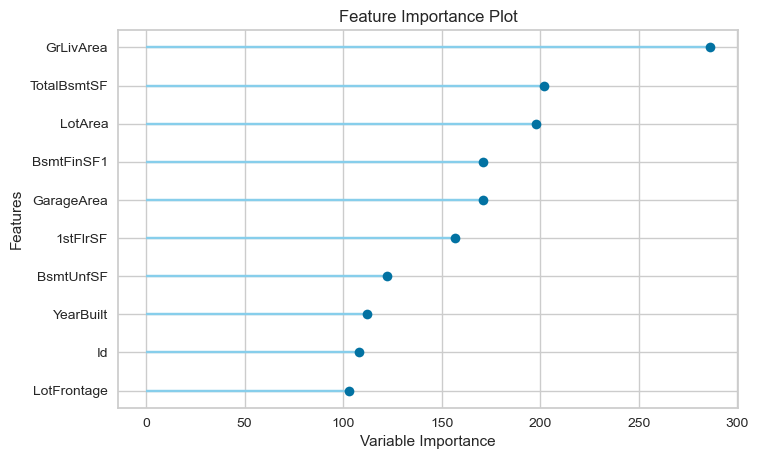

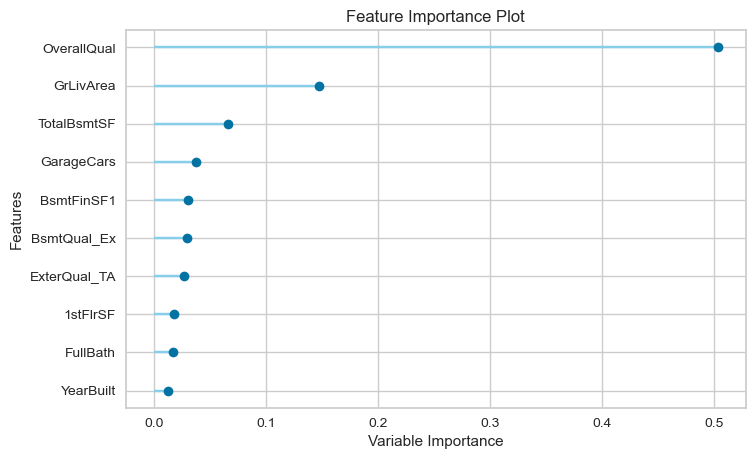

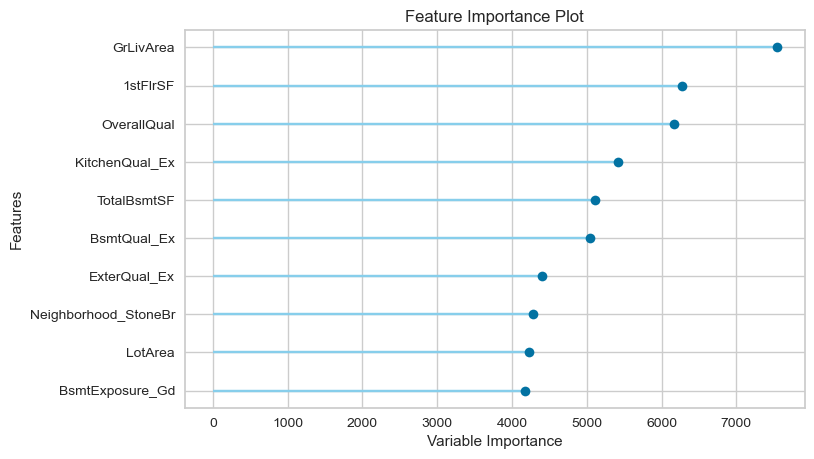

In [39]:
plot_model(model1, plot='feature')
plot_model(model2, plot='feature')
plot_model(model3, plot='feature')

7. Optimización de hiper-parámetros

In [40]:
tuned_model1 = tune_model(model1)
tuned_model2 = tune_model(model2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19388.9350,883189802.0267,29718.5094,0.8633,0.1415,0.1086
1,15292.9137,521351176.7084,22833.1158,0.8618,0.1675,0.1192
2,18645.7891,682232673.3387,26119.5841,0.8561,0.1679,0.1223
3,18909.7025,1039297409.2490,32238.1359,0.8291,0.1404,0.0983
4,19862.0544,1839035816.2250,42883.9809,0.5992,0.1815,0.1206
5,15784.3118,553120626.2861,23518.5167,0.9285,0.1587,0.1055
6,21610.4557,1243995694.3743,35270.3231,0.8503,0.1452,0.1091
7,19563.4849,1447391744.0109,38044.6020,0.8349,0.1632,0.1132
8,18982.5103,852126690.9484,29191.2091,0.8864,0.1253,0.0962


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,21613.2144,962022531.4501,31016.4881,0.8511,0.1538,0.1244
1,17645.0684,581706371.8749,24118.5898,0.8458,0.1799,0.1351
2,17183.5755,571874295.1480,23913.8933,0.8794,0.1602,0.1153
3,18276.4107,914424000.5527,30239.4444,0.8496,0.1328,0.0957
4,24925.2692,2520232648.0786,50201.9188,0.4507,0.2060,0.1434
5,16884.5194,548026779.1855,23409.9718,0.9292,0.1587,0.1087
6,21741.2383,1057392742.9117,32517.5759,0.8727,0.1653,0.1237
7,20836.9125,1275209321.7360,35710.0731,0.8545,0.1678,0.1223
8,18418.0276,779607342.8367,27921.4495,0.8961,0.1281,0.0962


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [41]:
evaluate_model(model1)
evaluate_model(tuned_model1)

evaluate_model(model2)
evaluate_model(tuned_model2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

8. Selección del modelo final:

In [67]:
best_model = compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [69]:
df_reset = df.reset_index(drop=True)

9. Almacenamiento del pipeline en el disco duro.

In [83]:
save_model(best_model, 'lab2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Id', 'MSSubClass', 'LotFrontage',
                                              'LotArea', 'OverallQual',
                                              'OverallCond', 'YearBuilt',
                                              'YearRemodAdd', 'MasVnrArea',
                                              'BsmtFinSF1', 'BsmtFinSF2',
                                              'BsmtUnfSF', 'TotalBsmtSF',
                                              '1stFlrSF', '2ndFlrSF',
                                              'LowQualFinSF', 'GrLivArea',
                                              'BsmtFullBath', 'BsmtHalfBath',
                                              'F...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='

10. Predicciones

In [84]:
from pycaret.classification import load_model

In [86]:
loaded_model = load_model('lab2')

Transformation Pipeline and Model Successfully Loaded


In [88]:
predictions = predict_model(loaded_model, data=test_data)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,8079.3173,195620730.4010,13986.4481,0.9626,0.0800,0.0479
